<a href="https://colab.research.google.com/github/asad9908/Autumn07/blob/main/Machine%20Learning/2125051079_7B_ASADUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import shutil


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/AUTUMN 7B/Machine Learning LAb/Dataset'

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/10 ━━━━━━━━━━━━━━━━━━━━ 1:05 8s/step - accuracy: 0.2266 - loss: 1.4189 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.2648 - loss: 1.4258 - val_accuracy: 0.3250 - val_loss: 1.3721
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.2877 - loss: 1.3855 - val_accuracy: 0.3875 - val_loss: 1.3036
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.3780 - loss: 1.3265 - val_accuracy: 0.4750 - val_loss: 1.2708
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.4190 - loss: 1.2804 - val_accuracy: 0.4500 - val_loss: 1.2184
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4760 - loss: 1.2027 - val_accuracy: 0.4125 - val_loss: 1.2209
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4752 - loss: 1.1925 - val_accuracy: 0.3875 - val_loss: 1.2267
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4638 - loss: 1.1726 - val_accuracy: 0.5625 - val_loss: 1.0728
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5418 - loss: 1.0575 - val_accuracy: 0.4750 - val_loss: 1.0583
Ep

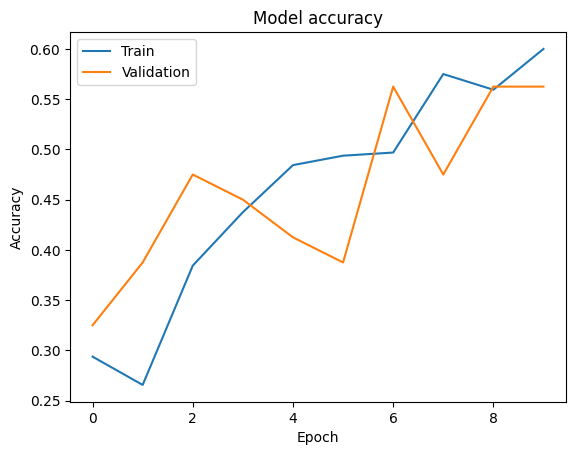

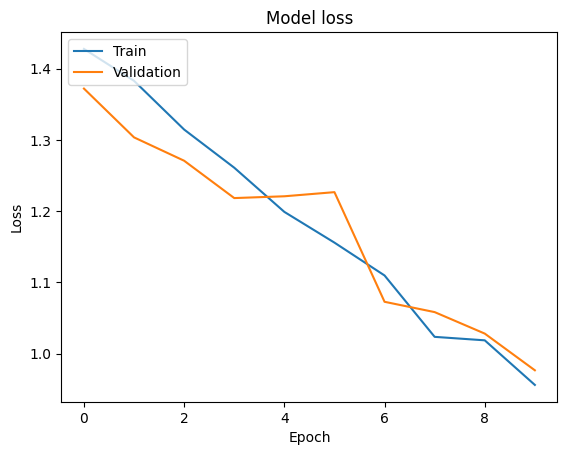

In [ ]:
# prompt: Apply image classification techniques on it(conventional and CNN) to train a model that can classify vehicles from their images

# Image preprocessing and data augmentation
image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use a validation split for training data
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use training subset
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' # Use validation subset
)


# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), # Dropout for regularization
    Dense(train_generator.num_classes, activation='softmax') # Output layer with softmax for multi-class
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs
    validation_data=validation_generator
)


# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()